In [81]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
df.isnull().head()

name  rating  genre   year  released  score  votes  director  writer  \
0  False   False  False  False     False  False  False     False   False   
1  False   False  False  False     False  False  False     False   False   
2  False   False  False  False     False  False  False     False   False   
3  False   False  False  False     False  False  False     False   False   
4  False   False  False  False     False  False  False     False   False   

    star  country  budget  gross  company  runtime  
0  False    False   False  False    False    False  
1  False    False   False  False    False    False  
2  False    False   False  False    False    False  
3  False    False   False  False    False    False  
4  False    False   False  False    False    False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(col, round(pct_missing*100))

name 0
rating 1
genre 0
year 0
released 0
score 0
votes 0
director 0
writer 0
star 0
country 0
budget 28
gross 2
company 0
runtime 0


In [7]:
df.describe().round(2)

year    score       votes        budget         gross  runtime
count  7668.00  7665.00     7665.00  5.497000e+03  7.479000e+03  7664.00
mean   2000.41     6.39    88108.50  3.558988e+07  7.850054e+07   107.26
std      11.15     0.97   163323.76  4.145730e+07  1.657251e+08    18.58
min    1980.00     1.90        7.00  3.000000e+03  3.090000e+02    55.00
25%    1991.00     5.80     9100.00  1.000000e+07  4.532056e+06    95.00
50%    2000.00     6.50    33000.00  2.050000e+07  2.020576e+07   104.00
75%    2010.00     7.10    93000.00  4.500000e+07  7.601669e+07   116.00
max    2020.00     9.30  2400000.00  3.560000e+08  2.847246e+09   366.00

In [8]:
np.isnan(df['budget']).sum()

2171

In [9]:
np.isnan(df['gross']).sum()

189

In [15]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [17]:
mean_value = df['budget'].mean()

In [20]:
mean_value

35589876.192650534

In [21]:
df['budget'].fillna(value=mean_value, inplace= True)
df.head(n=10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime  
0   46998772.0                  Warner Bros.    146.0  
1   58853106.0             Columbia Pictures    104.0  
2  538375067.0                     Lucasfilm    124.0  
3   83453539.0            Paramount Pictures     88.0  
4   39846344.0                Orion Pictures     98.0  
5   39754601.0            Paramount Pictures     95.0  
6  115229890.0            Universal Pictures    133.0  
7   23402427.0  Chartoff-Winkler Productions    129.0  
8  108185706.0                Dovemead Films    127.0  
9   15795189.0                United Artists    100.0

In [22]:
mean_value_gross = df['gross'].mean()
mean_value_gross

78500541.01778312

In [23]:
df['gross'].fillna(value=mean_value_gross, inplace= True)
df.head(n=10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime  
0   46998772.0                  Warner Bros.    146.0  
1   58853106.0             Columbia Pictures    104.0  
2  538375067.0                     Lucasfilm    124.0  
3   83453539.0            Paramount Pictures     88.0  
4   39846344.0                Orion Pictures     98.0  
5   39754601.0            Paramount Pictures     95.0  
6  115229890.0            Universal Pictures    133.0  
7   23402427.0  Chartoff-Winkler Productions    129.0  
8  108185706.0                Dovemead Films    127.0  
9   15795189.0                United Artists    100.0

In [24]:
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [25]:
df.size

115020

In [28]:
df.shape

(7668, 15)

In [32]:
df.sort_values(by=['gross'], inplace= False, ascending= False).head(n=10)

name rating      genre  year  \
5445                                      Avatar  PG-13     Action  2009   
7445                           Avengers: Endgame  PG-13     Action  2019   
3045                                     Titanic  PG-13      Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   
6646                                   Furious 7  PG-13     Action  2015   
7494                                   Frozen II     PG  Animation  2019   

                               released  score      votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000.0    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   
6646      April 3, 2015 (United States)    7.1   370000.0        James Wan   
7494  November 22, 2019 (United States)    6.8   148000.0       Chris Buck   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7480      Jeff Nathanson      Donald Glover  United States  260000000.0   
6653          Rick Jaffa        Chris Pratt  United States  150000000.0   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000.0   
6646        Chris Morgan         Vin Diesel  United States  190000000.0   
7494        Jennifer Lee       Kristen Bell  United States  150000000.0   

             gross                        company  runtime  
5445  2.847246e+09          Twentieth Century Fox    162.0  
7445  2.797501e+09                 Marvel Studios    181.0  
3045  2.201647e+09          Twentieth Century Fox    194.0  
6663  2.069522e+09                      Lucasfilm    138.0  
7244  2.048360e+09                 Marvel Studios    149.0  
7480  1.670728e+09           Walt Disney Pictures    118.0  
6653  1.670516e+09             Universal Pictures    124.0  
6043  1.518816e+09                 Marvel Studios    143.0  
6646  1.515341e+09             Universal Pictures    137.0  
7494  1.450027e+09  Walt Disney Animation Studios    103.0

<AxesSubplot:xlabel='gross', ylabel='budget'>

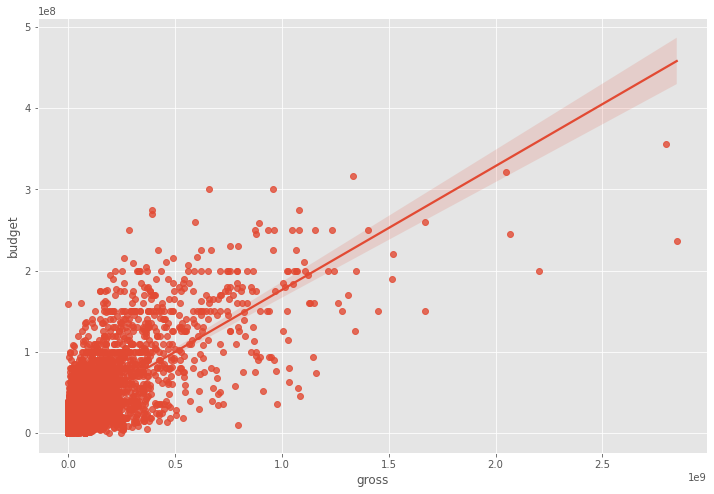

In [33]:
sns.regplot(x='gross', y='budget', data=df)

In [34]:
sns.regplot(x='score', y='budget', data=df)

<AxesSubplot:xlabel='score', ylabel='budget'>

In [36]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson').round(2)

year  score  votes  budget  gross  runtime
year     1.00   0.10   0.22    0.27   0.25     0.12
score    0.10   1.00   0.41    0.06   0.18     0.40
votes    0.22   0.41   1.00    0.42   0.63     0.31
budget   0.27   0.06   0.42    1.00   0.71     0.27
gross    0.25   0.18   0.63    0.71   1.00     0.24
runtime  0.12   0.40   0.31    0.27   0.24     1.00

In [37]:
df.corr(method='kendall').round(3)

year  score  votes  budget  gross  runtime
year     1.000  0.068  0.331   0.144  0.182    0.097
score    0.068  1.000  0.300   0.004  0.080    0.284
votes    0.331  0.300  1.000   0.162  0.508    0.198
budget   0.144  0.004  0.162   1.000  0.258    0.162
gross    0.182  0.080  0.508   0.258  1.000    0.156
runtime  0.097  0.284  0.198   0.162  0.156    1.000

In [38]:
df.corr(method= 'spearman').round(2)

year  score  votes  budget  gross  runtime
year     1.00   0.10   0.47    0.20   0.27     0.14
score    0.10   1.00   0.43    0.00   0.12     0.40
votes    0.47   0.43   1.00    0.24   0.69     0.29
budget   0.20   0.00   0.24    1.00   0.36     0.23
gross    0.27   0.12   0.69    0.36   1.00     0.23
runtime  0.14   0.40   0.29    0.23   0.23     1.00

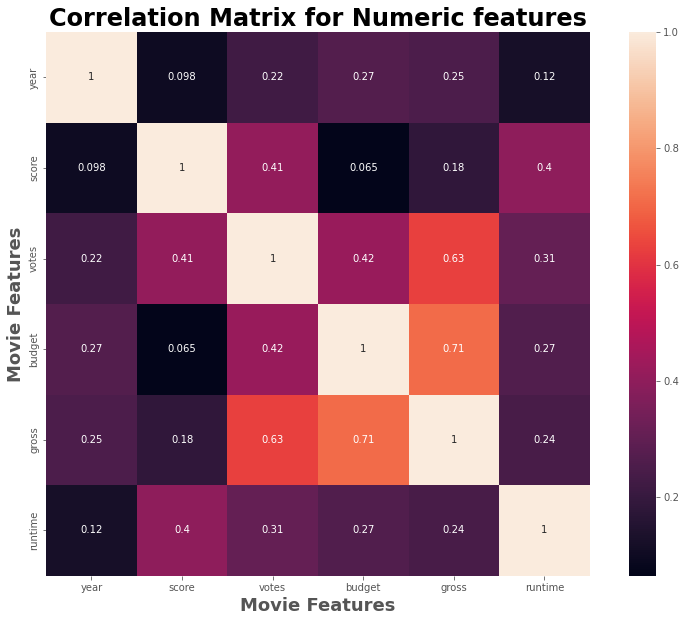

In [58]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot= True, fmt='.2g', square= True, yticklabels='auto', xticklabels='auto')

plt.title('Correlation Matrix for Numeric features', fontsize = 24, weight='bold')

plt.xlabel('Movie Features', fontsize = 18, weight='bold')

plt.ylabel('Movie Features', fontsize = 18, weight='bold')

plt.show()

In [53]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.143938  0.036367  0.965761  0.959015 -0.046733   
rating    0.143938  1.000000 -0.086723  0.156713  0.146606  0.012595   
genre     0.036367 -0.086723  1.000000  0.037184  0.035940 -0.002437   
year      0.965761  0.156713  0.037184  1.000000  0.993190 -0.044981   
released  0.959015  0.146606  0.035940  0.993190  1.000000 -0.045761   
score    -0.046733  0.012595 -0.002437 -0.044981 -0.045761  1.000000   
votes     0.287776  0.099972  0.023285  0.312401  0.299905 -0.009749   
director  0.745905  0.085520  0.047288  0.770497  0.770876 -0.022687   
writer    0.805211  0.103623  0.033688  0.824770  0.819617 -0.034685   
star      0.731565  0.093116  0.038649  0.756400  0.754468 -0.009896   
country   0.142828  0.000494 -0.015795  0.140216  0.148468  0.023097   
budget    0.275691  0.193229  0.069445  0.298022  0.284017 -0.011749   
gross     0.947540  0.158575  0.038635  0.981090  0.976647 -0.047004   
company   0.591667 -0.028035  0.009566  0.601571  0.607954 -0.028432   
runtime   0.048955  0.032741  0.001462  0.050647  0.048235  0.026436   

             votes  director    writer      star   country    budget  \
name      0.287776  0.745905  0.805211  0.731565  0.142828  0.275691   
rating    0.099972  0.085520  0.103623  0.093116  0.000494  0.193229   
genre     0.023285  0.047288  0.033688  0.038649 -0.015795  0.069445   
year      0.312401  0.770497  0.824770  0.756400  0.140216  0.298022   
released  0.299905  0.770876  0.819617  0.754468  0.148468  0.284017   
score    -0.009749 -0.022687 -0.034685 -0.009896  0.023097 -0.011749   
votes     1.000000  0.192220  0.224122  0.179601 -0.045914  0.395374   
director  0.192220  1.000000  0.748340  0.682385  0.155471  0.108033   
writer    0.224122  0.748340  1.000000  0.675685  0.157202  0.186680   
star      0.179601  0.682385  0.675685  1.000000  0.182045  0.110870   
country  -0.045914  0.155471  0.157202  0.182045  1.000000 -0.068884   
budget    0.395374  0.108033  0.186680  0.110870 -0.068884  1.000000   
gross     0.286308  0.751149  0.805784  0.735911  0.134123  0.282633   
company   0.008900  0.552258  0.546151  0.527116  0.226346 -0.087285   
runtime   0.106024 -0.011070  0.032264  0.035392  0.124154  0.115359   

             gross   company   runtime  
name      0.947540  0.591667  0.048955  
rating    0.158575 -0.028035  0.032741  
genre     0.038635  0.009566  0.001462  
year      0.981090  0.601571  0.050647  
released  0.976647  0.607954  0.048235  
score    -0.047004 -0.028432  0.026436  
votes     0.286308  0.008900  0.106024  
director  0.751149  0.552258 -0.011070  
writer    0.805784  0.546151  0.032264  
star      0.735911  0.527116  0.035392  
country   0.134123  0.226346  0.124154  
budget    0.282633 -0.087285  0.115359  
gross     1.000000  0.588371  0.043017  
company   0.588371  1.000000  0.005137  
runtime   0.043017  0.005137  1.000000

In [57]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies", fontsize = 24, weight='bold')

plt.xlabel("Movie features", fontsize = 18, weight='bold')

plt.ylabel("Movie features", fontsize = 18, weight='bold')

plt.show()

In [55]:
pip install --upgrade seaborn

  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sagar\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [56]:
import seaborn as sns
sns.__version__

'0.11.2'

In [59]:
 correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.143938
          genre       0.036367
          year        0.965761
          released    0.959015
          score      -0.046733
          votes       0.287776
          director    0.745905
          writer      0.805211
          star        0.731565
          country     0.142828
          budget      0.275691
          gross       0.947540
          company     0.591667
          runtime     0.048955
rating    name        0.143938
          rating      1.000000
          genre      -0.086723
          year        0.156713
          released    0.146606
          score       0.012595
          votes       0.099972
          director    0.085520
          writer      0.103623
          star        0.093116
          country     0.000494
          budget      0.193229
          gross       0.158575
          company    -0.028035
          runtime     0.032741
genre     name        0.036367
          rating     -0.086723
        

In [62]:
sorted_pairs = corr_pairs.sort_values(kind='quiksort', ascending= False)
print(sorted_pairs)

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
year      released    0.993190
released  year        0.993190
gross     year        0.981090
year      gross       0.981090
gross     released    0.976647
released  gross       0.976647
year      name        0.965761
name      year        0.965761
released  name        0.959015
name      released    0.959015
          gross       0.947540
gross     name        0.947540
year      writer      0.824770
writer    year        0.824770
          released    0.819617
released  writer      0.819617
writer    gross       0.805784
gross   

In [64]:
strong_pairs = sorted_pairs[abs(sorted_pairs)>0.5]
strong_pairs

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
year      released    0.993190
released  year        0.993190
gross     year        0.981090
year      gross       0.981090
gross     released    0.976647
released  gross       0.976647
year      name        0.965761
name      year        0.965761
released  name        0.959015
name      released    0.959015
          gross       0.947540
gross     name        0.947540
year      writer      0.824770
writer    year        0.824770
          released    0.819617
released  writer      0.819617
writer    gross       0.805784
gross   

In [71]:
comp_gross_sum = df.groupby('company')[['gross']].sum()
comp_gross_sum_sorted = comp_gross_sum.sort_values('gross', ascending= False)
comp_gross_sum_sorted = comp_gross_sum_sorted['gross'].astype('int64')
comp_gross_sum_sorted.head(n=10)

company
Warner Bros.             56569922347
Universal Pictures       52592689431
Columbia Pictures        43008941346
Paramount Pictures       40572107956
Twentieth Century Fox    40257053857
Walt Disney Pictures     36327887792
New Line Cinema          19883797684
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Touchstone Pictures      11795832638
Name: gross, dtype: int64

In [72]:
df.groupby(['company', 'year'])[["gross"]].sum().head(n=10)

gross
company                             year             
"DIA" Productions GmbH & Co. KG     2003   44350926.0
"Weathering With You" Film Partners 2019  193457467.0
.406 Production                     1996      10580.0
1+2 Seisaku Iinkai                  2000    1196218.0
10 West Studios                     2010     814906.0
120 Films                           2002    6479328.0
120dB Films                         2009      26676.0
                                    2016     368372.0
13 Productions                      2000      25461.0
1492 Pictures                       1996  129832389.0

In [73]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [74]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [75]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [76]:
df.head(n=10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime  
0   46998772.0                  Warner Bros.    146.0  
1   58853106.0             Columbia Pictures    104.0  
2  538375067.0                     Lucasfilm    124.0  
3   83453539.0            Paramount Pictures     88.0  
4   39846344.0                Orion Pictures     98.0  
5   39754601.0            Paramount Pictures     95.0  
6  115229890.0            Universal Pictures    133.0  
7   23402427.0  Chartoff-Winkler Productions    129.0  
8  108185706.0                Dovemead Films    127.0  
9   15795189.0                United Artists    100.0

In [78]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(n=20)

name  rating  genre  year  released  score      votes  director  writer  \
0   6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1   5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2   5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3    286       4      4  1980      1492    7.7   221000.0      1301    2000   
4   1027       6      4  1980      1543    7.3   108000.0      1054     521   
5   2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6   5574       6      0  1980      1771    7.9   188000.0      1412     838   
7   4436       6      3  1980       699    8.2   330000.0      1829    1769   
8   5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9   6213       6      3  1980      2286    7.0    10000.0      2864     423   
10   463       4      0  1980       674    6.1    18000.0       357    3985   
11  5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12  4315       4      1  1980       626    5.3    30000.0      2352    2333   
13  4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14  1687       6      5  1980      1543    7.1    37000.0       318     520   
15  5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16  1900       6      6  1980      2286    6.6    21000.0        49     735   
17    92       4      4  1980       699    6.9    29000.0       514    3262   
18  5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19  5189       6      4  1980       626    6.8    26000.0      2561     556   

    star  country        budget        gross  company  runtime  
0   1047       54  1.900000e+07   46998772.0     2319    146.0  
1    327       55  4.500000e+06   58853106.0      731    104.0  
2   1745       55  1.800000e+07  538375067.0     1540    124.0  
3   2246       55  3.500000e+06   83453539.0     1812     88.0  
4    410       55  6.000000e+06   39846344.0     1777     98.0  
5    241       55  5.500000e+05   39754601.0     1812     95.0  
6   1277       55  2.700000e+07  115229890.0     2281    133.0  
7   2240       55  1.800000e+07   23402427.0      631    129.0  
8    877       55  5.400000e+07  108185706.0      883    127.0  
9    589       55  1.000000e+07   15795189.0     2272    100.0  
10   483       55  1.500000e+07   70687344.0     2190    116.0  
11  1949       44  5.000000e+06   30031783.0      522    109.0  
12  2262       55  2.000000e+07   49823037.0     1812    114.0  
13   678       55  6.000000e+06   54766923.0     1812    124.0  
14  1850       55  6.500000e+06   31899000.0     1074    104.0  
15   465       55  5.100000e+06    9709597.0     1935    103.0  
16   707       55  3.558988e+07   21202829.0     1637    134.0  
17  1110       55  1.000000e+07  103300686.0     1304    109.0  
18    24       55  1.000000e+06   21448782.0       74     89.0  
19   878       55  3.558988e+07  101300000.0      731    111.0

In [82]:
df_numerized.corr('pearson')

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.020368 -0.126046 -0.310566  0.265578  0.012263  0.064554   
gross     0.005466 -0.102116 -0.230267  0.252042  0.001636  0.182868   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.012263   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.064554   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.421090   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.033216   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget    0.421090 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross     0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.265305   

             gross   company   runtime  
name      0.005466  0.009211  0.010392  
rating   -0.102116 -0.032943  0.062145  
genre    -0.230267 -0.071067 -0.052711  
year      0.252042 -0.010431  0.120811  
released  0.001636 -0.010474  0.000868  
score     0.182868  0.001030  0.399451  
votes     0.628713  0.133204  0.309212  
director -0.014272  0.004404  0.017624  
writer   -0.023210  0.005646 -0.003511  
star     -0.002682  0.012442  0.010174  
country   0.089949  0.095548 -0.078412  
budget    0.711270  0.144851  0.265305  
gross     1.000000  0.152694  0.241336  
company   0.152694  1.000000  0.034402  
runtime   0.241336  0.034402  1.000000

In [80]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [83]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [84]:
# Data Types for our columns

print(df.dtypes)

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
dtype: object


In [85]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<AxesSubplot:>

In [86]:
sns.swarmplot(x="rating", y="gross", data=df)

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sagar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points

<AxesSubplot:xlabel='rating', ylabel='gross'>